In [ ]:
%cd ..

In [1]:
import pandas as pd

df = pd.read_json(r'C:\Users\admin\medical_data_saved\drugs\crawled\raw.json')
print(df.head())

                 drug_name                                               link  \
0             Parafizz 650  https://songkhoe.medplus.vn/thuoc-parafizz-650...   
1                   Damrin  https://songkhoe.medplus.vn/thuoc-damrin-lieu-...   
2                   Gonesi                https://songkhoe.medplus.vn/gonesi/   
3              Bayer (Đức)  https://www.nhathuocankhang.com/thuoc-tiet-nie...   
4  Bổ thận dương Nhất Nhất  https://songkhoe.medplus.vn/thuoc-bo-than-duon...   

                                           chemicals  \
0  Paracetamol 650 mg\n(Tá dược gồm: acid citric ...   
1               Mỗi viên nang chứa:\nDiacerein 50 mg   
2                           Mỗi viên của Gonesi chứa   
3  Trong mỗi viên Progynova 2mg chứa:\nHoạt chất:...   
4                        Mỗi viên nén bao phim chứa:   

                                               usage  \
0  \nĐiều trị các triệu chứng đau nhức và sốt từ ...   
1  Thuốc Damrin là thuốc ETC được dùng để điều...   
2  Gones

In [2]:
df['chemicals_length'] = df['chemicals'].str.len()
print(df['chemicals_length'].describe())

long_chemicals = df[df['chemicals_length'] > 2000][['drug_name', 'chemicals', 'chemicals_length']]
long_chemicals.value_counts().sum()
print(long_chemicals)

count    45088.000000
mean        84.186812
std        127.032901
min          1.000000
25%         21.000000
50%         41.000000
75%        113.000000
max       6753.000000
Name: chemicals_length, dtype: float64
                           drug_name  \
3179                Epfepara codeine   
7008                   Meyersina 100   
10300        Cao ích mẫu Mediplantex   
10329  Terpin Codein - F Mediplantex   
15619         Diclofenac 50 Cửu Long   
17855                   Noclaud 50mg   
20073                         Ukapin   
21173                  Degodas 2,5mg   
26796                  Carmotop 50mg   
29085  Paracetamol 650mg Mediplantex   
29558                    Roscef 10mg   
31051                    Zaclid 20mg   
31797                 RICHSTATIN 5mg   
32953                          ADMED   
32956                       Penveril   
33587                  Degodas 2,5mg   
33770        Cao ích mẫu Mediplantex   
34107           Medikids Mediplantex   
35279                    

In [3]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45083     True
45084    False
45085    False
45086     True
45087    False
Length: 45088, dtype: bool

In [4]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38471 entries, 0 to 45087
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   drug_name         38471 non-null  object
 1   link              38471 non-null  object
 2   chemicals         38471 non-null  object
 3   usage             38471 non-null  object
 4   side_effects      38471 non-null  object
 5   chemicals_length  38471 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [5]:
sub_df = df[['drug_name', 'chemicals']].copy()
print(sub_df.head())

                 drug_name                                          chemicals
0             Parafizz 650  Paracetamol 650 mg\n(Tá dược gồm: acid citric ...
1                   Damrin               Mỗi viên nang chứa:\nDiacerein 50 mg
2                   Gonesi                           Mỗi viên của Gonesi chứa
3              Bayer (Đức)  Trong mỗi viên Progynova 2mg chứa:\nHoạt chất:...
4  Bổ thận dương Nhất Nhất                        Mỗi viên nén bao phim chứa:


In [ ]:
import re
import unicodedata
import pandas as pd

def clean_chemicals(text, drug_name=None):
    if pd.isna(text):
        return pd.NA

    text = unicodedata.normalize('NFKC', str(text)).lower()

    text = re.sub(r'1\s*thành phần\s*:?', '', text)
    text = re.sub(r'(thành phần\s*:?\s*){1,2}', '', text)

    text = re.sub(r'\bmỗi\s*(viên|viên nén|viên nang|viên thuốc|lọ|ống|chai|gói|ml)?\s*(thuốc|sản phẩm)?\b', '', text)

    text = re.sub(r'(là thuốc gì.*|thuốc gì.*|cách dùng.*|thuốc này.*|câu hỏi.*|chỉ định.*|sử dụng.*)', '', text)

    if drug_name:
        drug_name_norm = unicodedata.normalize('NFKC', str(drug_name)).lower()
        text = re.sub(re.escape(drug_name_norm), '', text)

    stopwords = [
        'thành phần', 'thuốc', 'gói', 'ống', 'lọ', 'nén', 'nang',
        'bao phim', 'bao chế', 'dưới dạng', 'hàm lượng', 'được dùng', 'được',
        'bao gồm', 'là', 'chứa', 'tá dược.*', 'vừa đủ.*',
        'trong', 'sản phẩm', 'của', 'dạng', 'với'
    ]
    
    pattern_stopwords = r'\b(' + '|'.join(stopwords) + r')\b'
    text = re.sub(pattern_stopwords, '', text)

    text = re.sub(r'[^\w\s%/.,μgmgmlmcgiu]', ' ', text)

    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Áp dụng
sub_df['chemicals'] = sub_df['chemicals'].apply(clean_chemicals)
sub_df['drug_name'] = sub_df['drug_name'].apply(clean_chemicals)


In [7]:
sub_df['chemicals_length'] = sub_df['chemicals'].str.len()
print(sub_df['chemicals_length'].describe())

count    38471.000000
mean        49.739596
std         87.931055
min          0.000000
25%         17.000000
50%         31.000000
75%         57.000000
max       6015.000000
Name: chemicals_length, dtype: float64


In [8]:
long_chemicals = sub_df[sub_df['chemicals_length'] > 2000][['drug_name', 'chemicals', 'chemicals_length']]
long_chemicals.value_counts().sum()
print(long_chemicals)

                     drug_name  \
3179          epfepara codeine   
7008             meyersina 100   
10300  cao ích mẫu mediplantex   
15619   diclofenac 50 cửu long   
21173            degodas 2,5mg   
26796            carmotop 50mg   
31797           richstatin 5mg   
32953                    admed   
32956                 penveril   
34107     medikids mediplantex   
35279                 niglyvid   
43052               merovia 1g   

                                               chemicals  chemicals_length  
3179   epfepara codeine hoạt chất acetaminophen 500mg...              2263  
7008   sildenafil sildenafil citrate 100mg và . bào c...              3854  
10300  cao ích mẫu mediplantex 60,43g cao lỏng hỗn hợ...              2257  
15619  diclofenac 50 cửu long hoạt chất diclofenac na...              3780  
21173  degodas 2,5mg hoạt chất ibandronic acid 2,5mg....              2412  
26796  carmotop 50mg hoạt chất metoprolol tartrat 50m...              6015  
31797  richstatin 

In [ ]:
import re

def extract_chemicals(text, drug_name=None):
    if pd.isna(text) or not isinstance(text, str) or len(text.strip()) == 0:
        return [{'ingredient': '', 'dose': None}]
    
    text = text.lower()
    
    if isinstance(drug_name, str) and len(drug_name.strip()) > 0:
        drug_name = drug_name.lower()
        text = re.sub(re.escape(drug_name), '', text)
    
    units = r'mg|g|mcg|μg|ml|m\s?ui|iu|%|mg/ml|g/ml|iu/ml'
    dose_pattern = rf'(?:\d+(?:[\.,]\d+)?(?:\s*/\s*\d+(?:[\.,]\d+)?\s*)?(?:\s*(?:{units}))?)'

    matches = re.findall(
        rf'([a-zàáạảãâầấậẩẫăằắặẳẵêềếệểễèéẹẻẽôồốộổỗơờớợởỡưừứựửữùúụủũìíịỉĩỳýỵỷỹđ\s\-]+?)\s*({dose_pattern})',
        text
    )

    results = []
    for ing, dose in matches:
        ing = re.sub(r'\s+', ' ', ing.strip())
        dose = dose.replace(',', '.').replace(' ', '')
        results.append({'ingredient': ing, 'dose': dose})
    
    if not results:
        short = text.split('.')[0].split('\n')[0][:40]
        return [{'ingredient': short.strip(), 'dose': None}]
    
    return results

sub_df['chemicals'] = sub_df['chemicals'].apply(extract_chemicals)



In [15]:
sub_df.head(50)

,drug_name,chemicals,chemicals_length
0,parafizz 650,"[{'ingredient': 'paracetamol', 'dose': '650mg'}]",20
1,damrin,"[{'ingredient': 'diacerein', 'dose': '50mg'}]",15
2,gonesi,"[{'ingredient': 'gonesi', 'dose': None}]",6
3,bayer đức,"[{'ingredient': 'progynova', 'dose': '2mg'}, {...",49
4,bổ thận dương nhất nhất,"[{'ingredient': '', 'dose': None}]",0
5,propara 450mg/3ml,"[{'ingredient': 'propara', 'dose': '450mg'}]",17
6,acepron,"[{'ingredient': 'paracetamol', 'dose': None}]",11
7,newtiam,"[{'ingredient': '', 'dose': None}]",0
8,piroxicam stada 20mg,"[{'ingredient': 'piroxicam', 'dose': '20mg'}]",14
9,fuspiro,"[{'ingredient': 'fuspiro có spironolacton', 'd...",90


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np

df_pics = pd.read_pickle(r"C:\Users\admin\Documents\data\data.pkl")

base_path = r"C:\Users\admin\Documents\data\.data"
df_pics['abs_path'] = df_pics['path'].apply(lambda p: os.path.join(base_path, os.path.basename(p)))

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    contrast = clahe.apply(blur)
    thresh = cv2.adaptiveThreshold(contrast, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 10)
    return thresh

df_pics['preprocessed'] = df_pics['abs_path'].apply(preprocess_image)


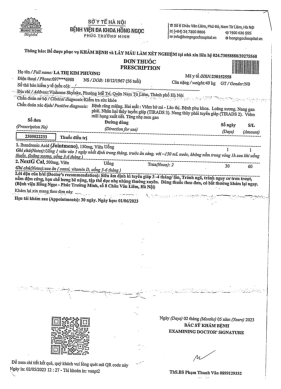

In [41]:
import matplotlib.pyplot as plt

img = df_pics['preprocessed'].iloc[1]
if img is not None:
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()


In [47]:
import easyocr

reader = easyocr.Reader(['vi', 'en'])

def extract_text_from_preprocessed(img):
    if img is None:
        return []
    return reader.readtext(img, detail=0)

df_pics['ocr_text'] = df_pics['preprocessed'].apply(extract_text_from_preprocessed)

def extract_medicine_lines(lines):
    results = []
    for l in lines:
        text = l.strip().lower()
        if any(unit in text for unit in ['viên', 'mg', 'gói', 'ml']) or re.match(r'^\d\.', text):
            results.append(l.strip())
    return results

df_pics['medicines'] = df_pics['ocr_text'].apply(extract_medicine_lines)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\admin\as.drug_indexer\env_py313\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [48]:
print(df_pics[['path', 'medicines']])

                                      path  \
0  .data/a8e7c9eca5b61ee847a7.jpg.0000.png   
1    .data/20140119215734_001.pdf.0000.png   
2    .data/20231213145107_001.pdf.0000.png   

                                           medicines  
0  [viên:, Ngay uống Io viên:, Modoni' S(Dompcrid...  
1  [20MG XoC 7, 1.Dbandronic Acid, Viên, 1 viên v...  
2                [50Omg, Viên, 450mg, 5Omg, '500mg)]  


In [46]:
df_pics['medicines'].head(5)

0    [575v2aTo)7, viên:, 300, 1, Ngay uống Io viên:...
1    [20MG XoC 7, 1900 636 555:, 2305022233, 1.Dban...
2    [1, 2 viện/ 2, 2, 14, 4, 60, 20, 2307200318, 5...
Name: medicines, dtype: object